# Vamos importar o que será utilizado na análise

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


## Então, vamos importar e limpar a planilha que será utilizada. Vamos utilzar os dados de morte no Brasil por localidade

In [18]:
df = pd.read_csv('https://query.data.world/s/tstat4gakq4viuuxzxqzmq2er5hb4b?dws=00000')
df


,Unnamed: 0,X,Cidade,Registros,Ano,Mês,Região,Estado
0,1,1,Brasiléia,6,2015,Janeiro,Todas,Acre
1,2,2,Bujari,1,2015,Janeiro,Todas,Acre
2,3,3,Capixaba,2,2015,Janeiro,Todas,Acre
3,4,4,Cruzeiro do Sul,74,2015,Janeiro,Todas,Acre
4,5,5,Epitaciolândia,3,2015,Janeiro,Todas,Acre
...,...,...,...,...,...,...,...,...
415631,415632,70233,Tocantínia,4,2022,Dezembro,Todas,Tocantins
415632,415633,70234,Tocantinópolis,6,2022,Dezembro,Todas,Tocantins
415633,415634,70235,Tupiratins,2,2022,Dezembro,Todas,Tocantins
415634,415635,70236,Wanderlândia,2,2022,Dezembro,Todas,Tocantins


Exclui a primeira coluna, pois é exatamente igual ao índice

In [19]:
df = df.drop(['Unnamed: 0', 'Região', 'X'], axis = 1)

Crio uma variável com os nomes das colunas para facilitar a visualização deles e facilitar o acesso em momentos posteriores

In [20]:
colunas = list(df.columns)
colunas


['Cidade', 'Registros', 'Ano', 'Mês', 'Estado']

Então verifico se existe algum valor duplicado no arquivo

In [21]:
df.duplicated().sum()

np.int64(0)

Verifico também se há algum dado ausente

In [22]:
df.isna().sum()

Cidade       0
Registros    0
Ano          0
Mês          0
Estado       0
dtype: int64

Em seguida, vamos verificar os tipo de dado de cada uma das variáveis do banco de dados. Para isso criamos uma nova planilha. 
Nela criamos uma coluna para registrar os tipos de variável, e uma segunda coluna para verificar quantas entradas únicas há para cada varíavel do banco de dados utilizado

In [23]:
unico = df.nunique().sort_values()

unico = pd.DataFrame(unico.values, index = unico.index, columns = ['NUniques'])

unico['dtypes'] = df.dtypes

unico

,NUniques,dtypes
Ano,8,int64
Mês,12,object
Estado,27,object
Registros,1577,int64
Cidade,4941,object


Adicionei uma coluna na tabela inicial com valores de total geral de morte por estado por mês para cada ano

In [ ]:
df['Total_mensal_por_ano']= df.groupby(['Estado', 'Ano','Mês'])['Registros'].transform('sum')

A planilha final pode ser vista abaixo

In [25]:
df

,Cidade,Registros,Ano,Mês,Estado,Total_mensal_por_ano
0,Brasiléia,6,2015,Janeiro,Acre,290
1,Bujari,1,2015,Janeiro,Acre,290
2,Capixaba,2,2015,Janeiro,Acre,290
3,Cruzeiro do Sul,74,2015,Janeiro,Acre,290
4,Epitaciolândia,3,2015,Janeiro,Acre,290
...,...,...,...,...,...,...
415631,Tocantínia,4,2022,Dezembro,Tocantins,587
415632,Tocantinópolis,6,2022,Dezembro,Tocantins,587
415633,Tupiratins,2,2022,Dezembro,Tocantins,587
415634,Wanderlândia,2,2022,Dezembro,Tocantins,587


Separo somente valores do ano de 2022, que é a análise que faremos agora

In [ ]:
Ano2022 = df[df['Ano']==2022]


E em seguida eu gero um gráfico de barras para cada mês de 2022. O grafico mostra o total de mortes por estado em ordem decrescente

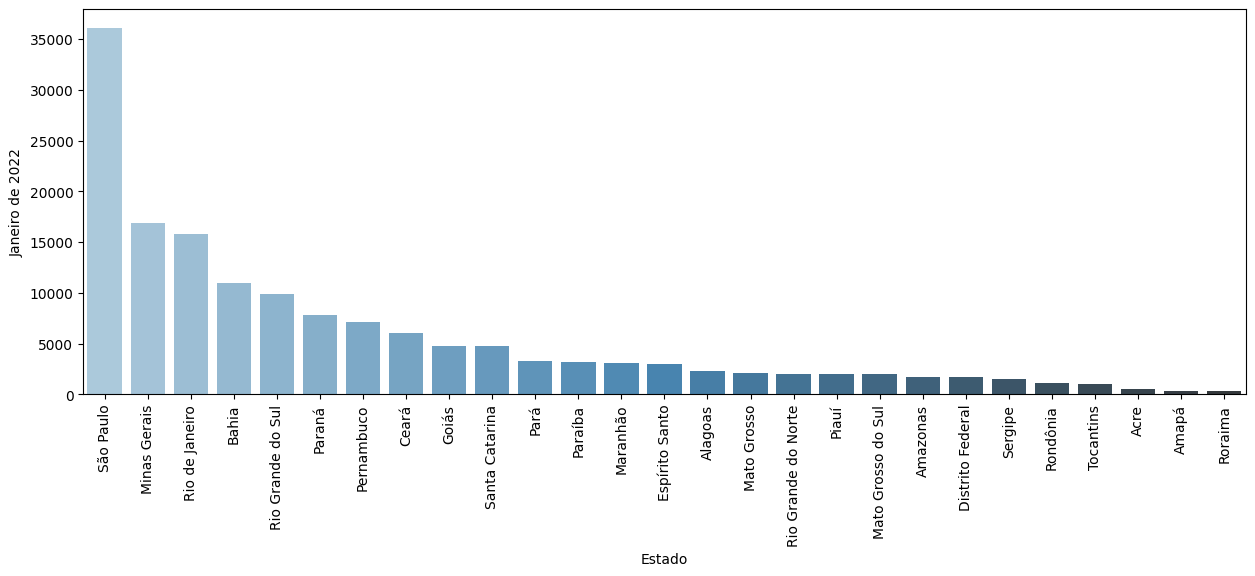

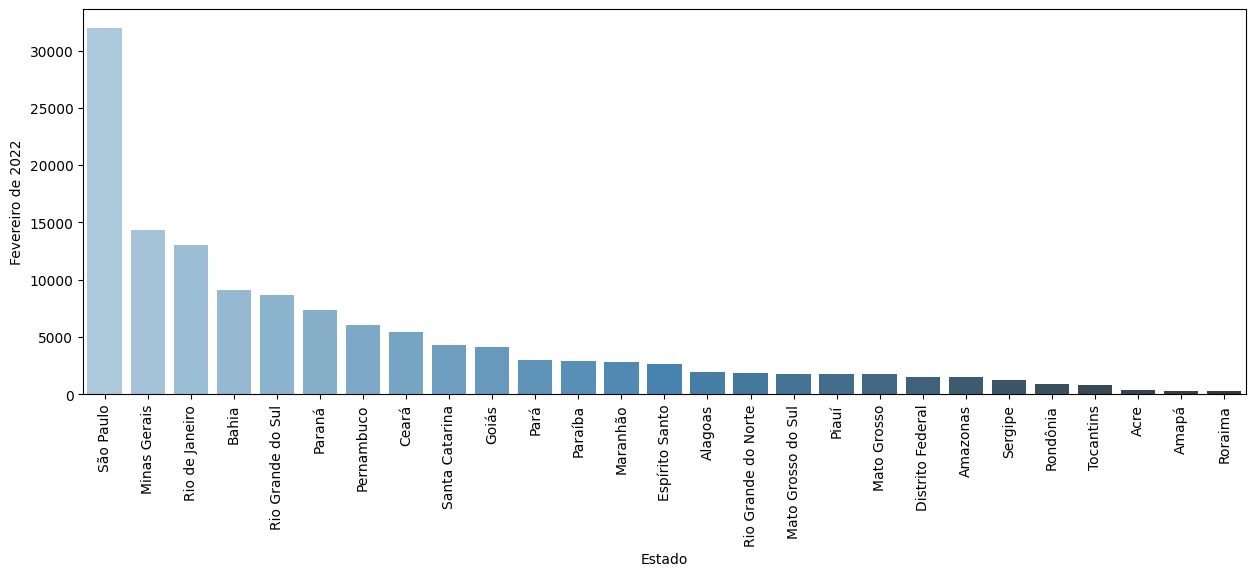

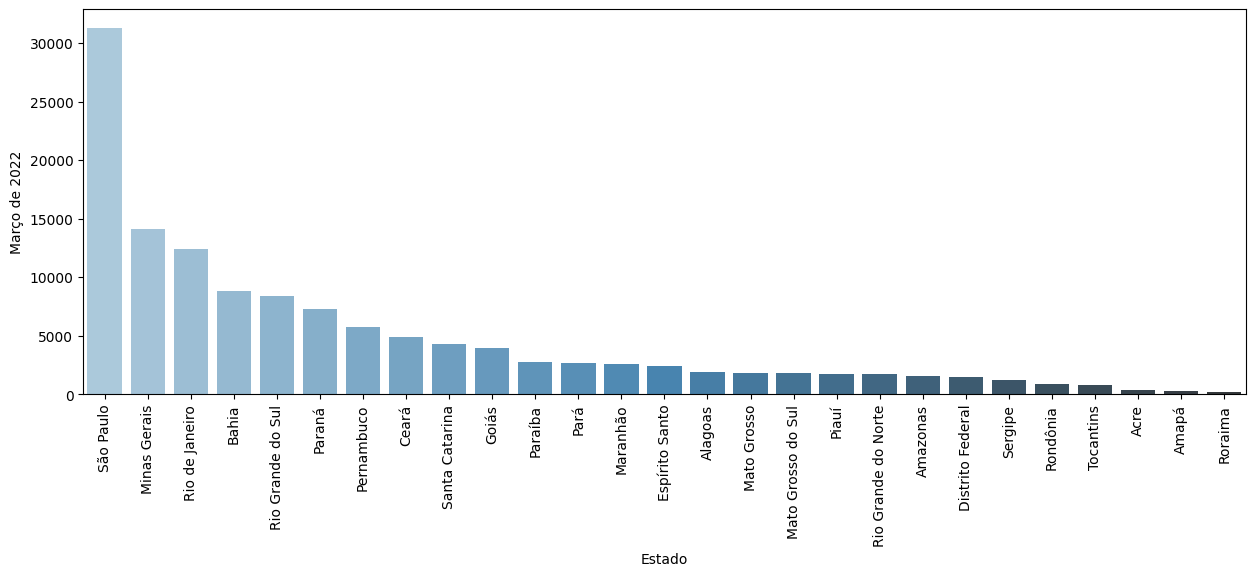

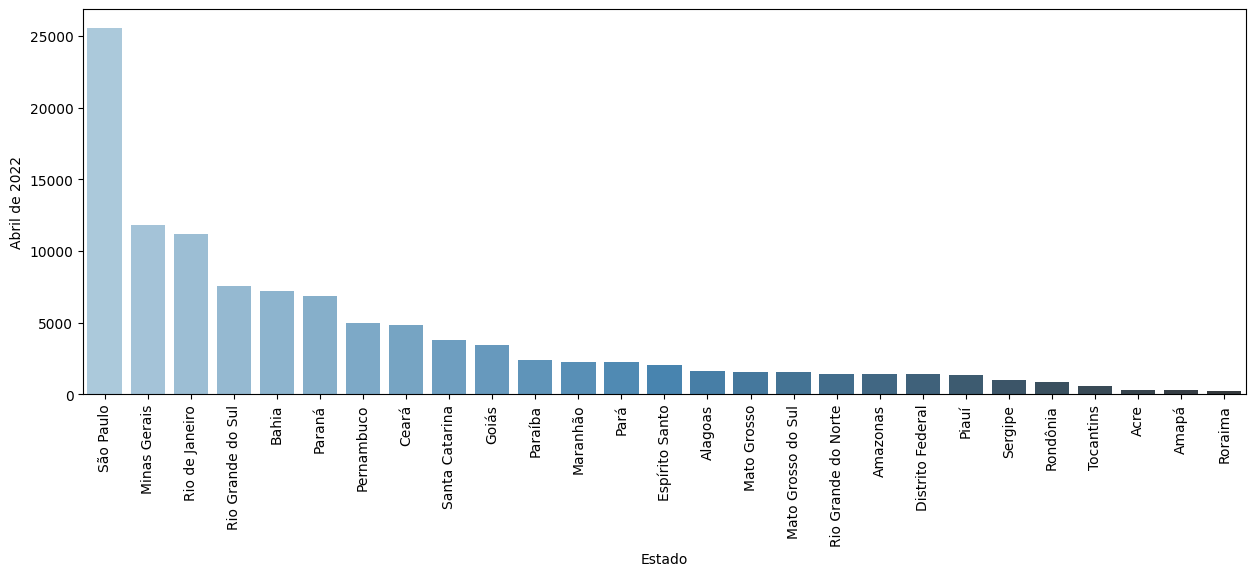

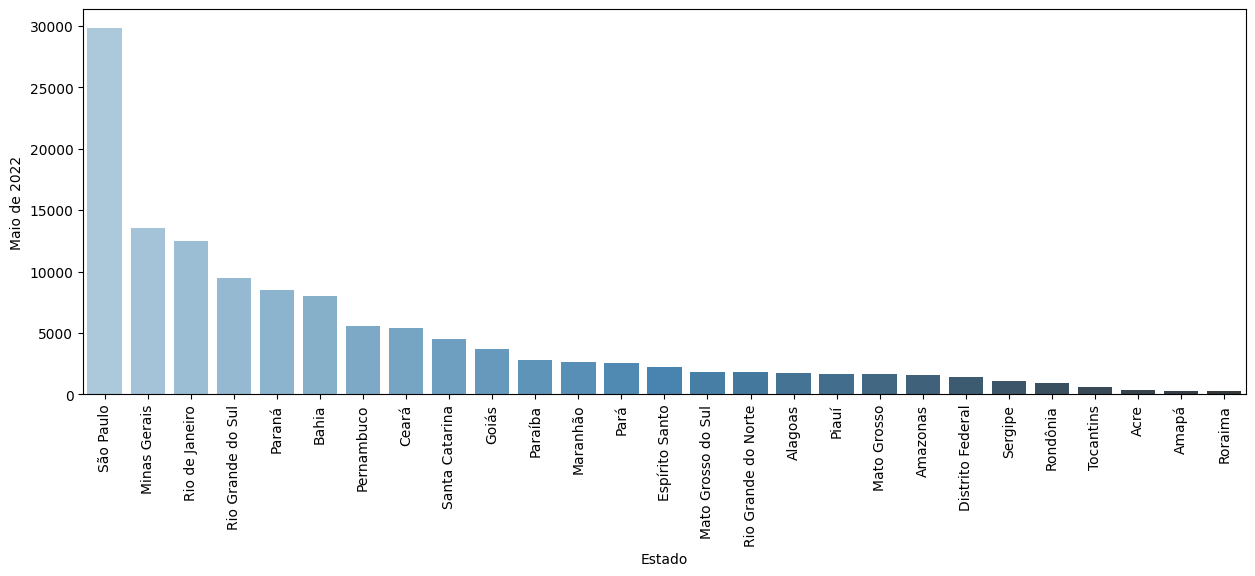

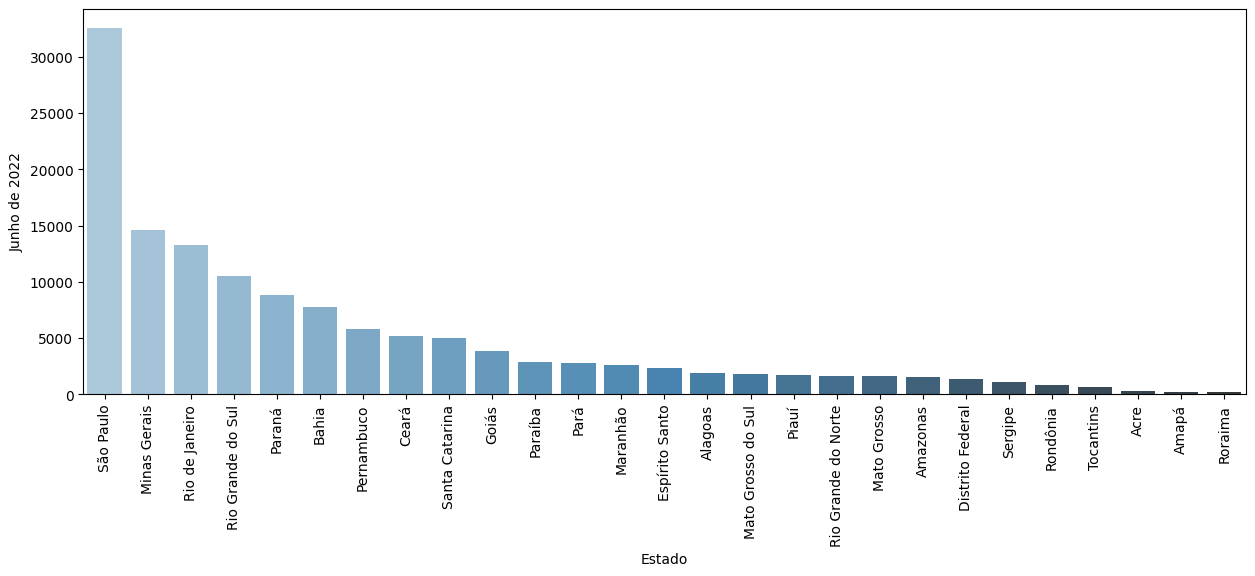

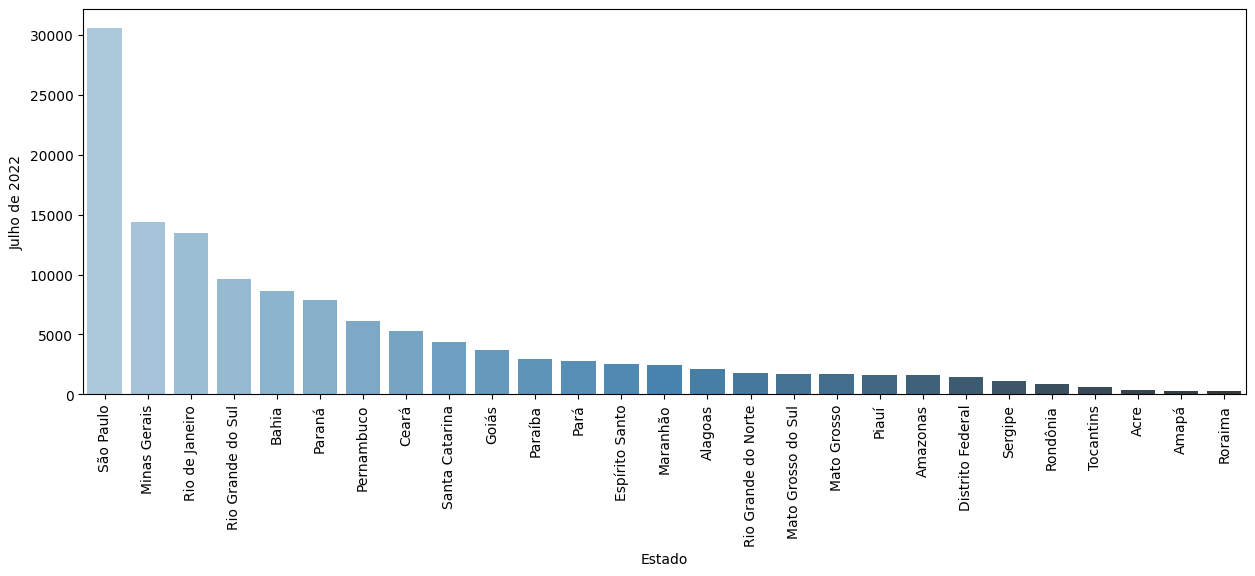

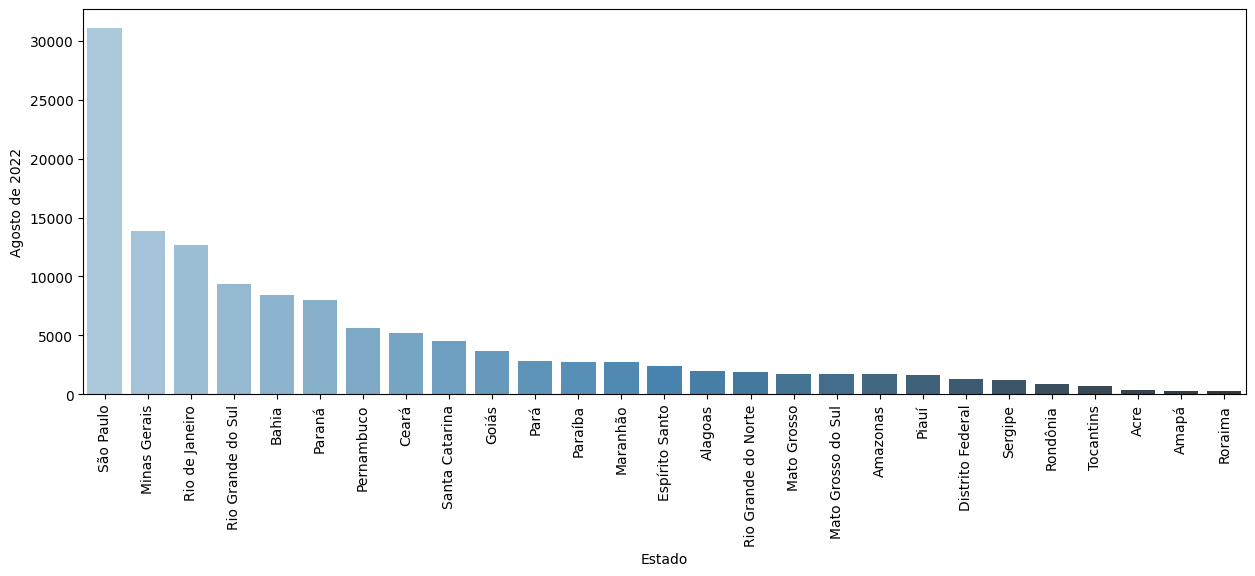

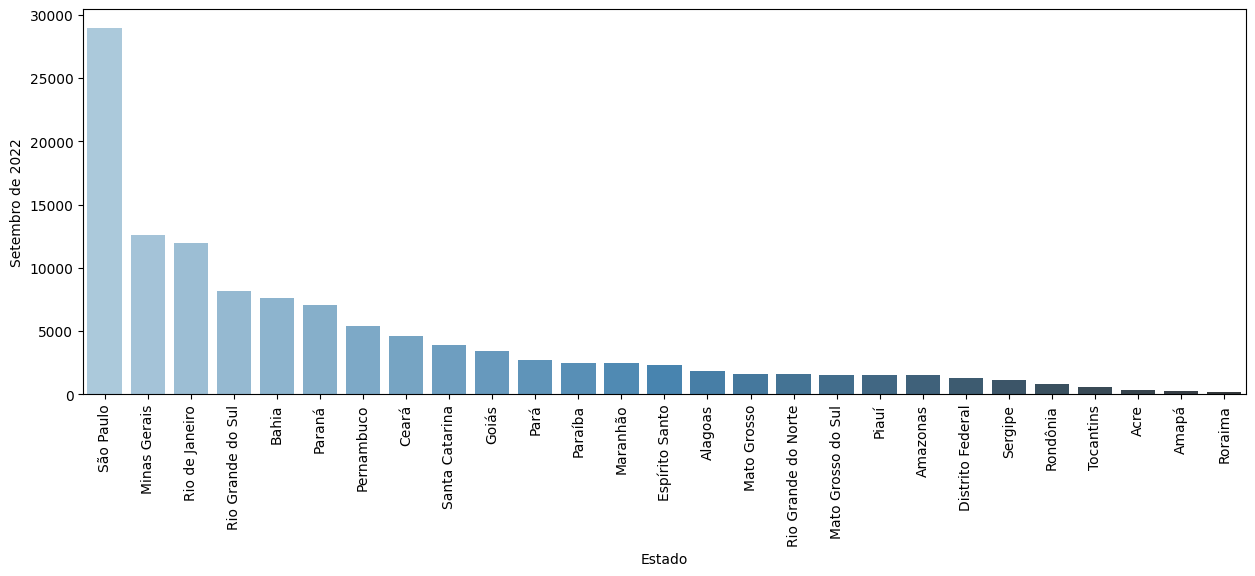

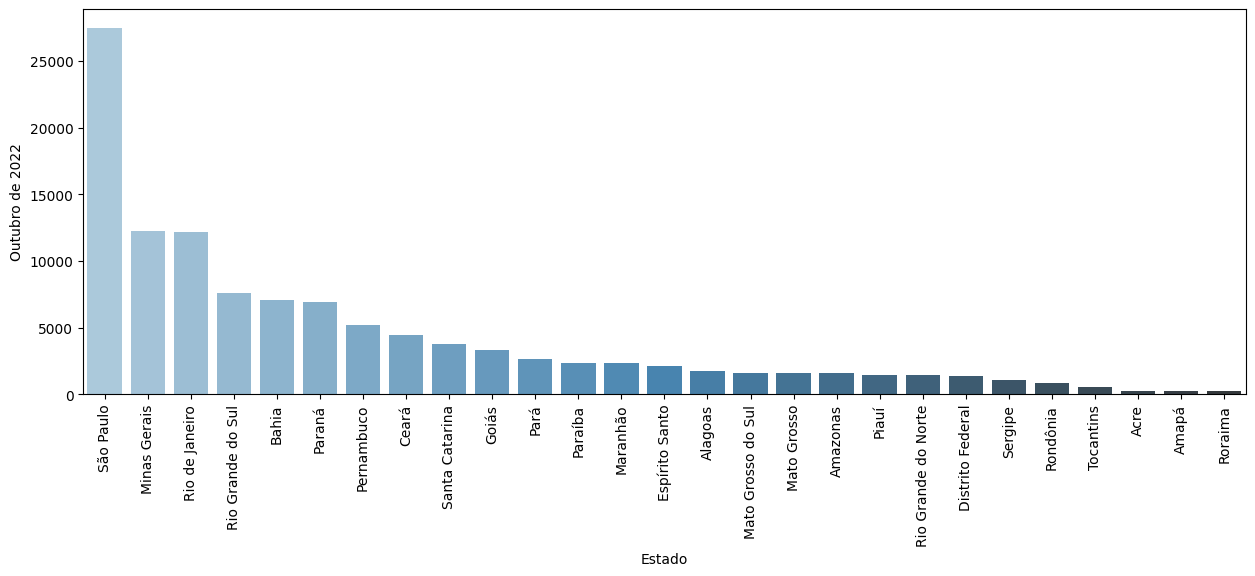

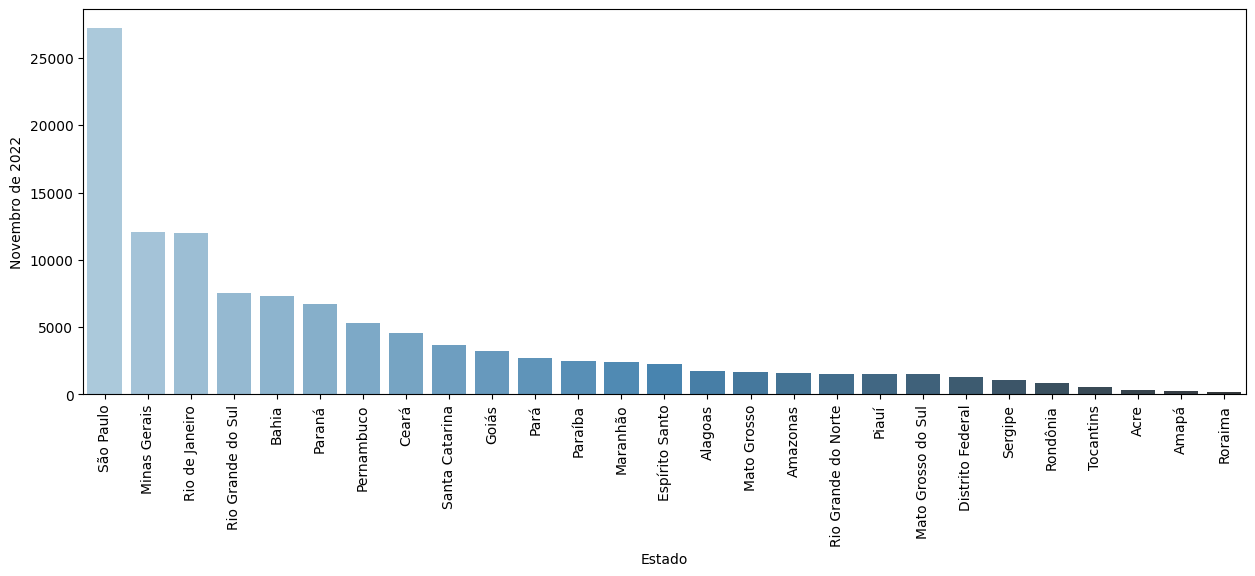

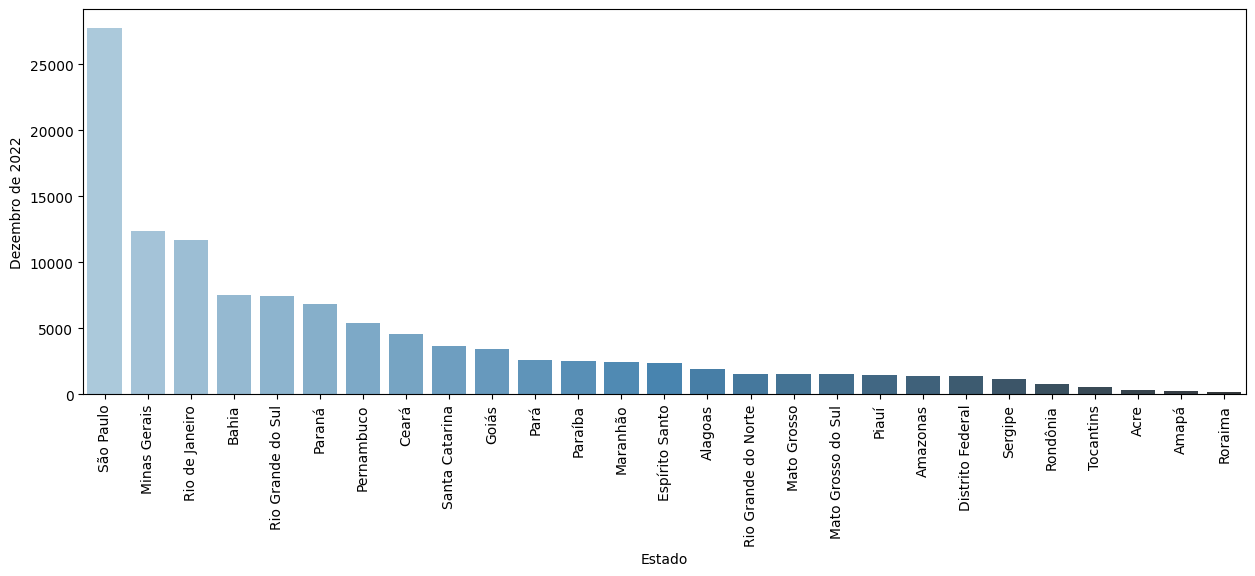

In [27]:
for i in Ano2022['Mês'].unique():
  mês = Ano2022[Ano2022['Mês']==i]
  mês = mês[['Estado', 'Total_mensal_por_ano']].drop_duplicates()
  fig, ax = plt.subplots(figsize=(15,5))
  sns.barplot(data=mês, x='Estado', y='Total_mensal_por_ano', order=mês.sort_values('Total_mensal_por_ano', ascending=False).Estado,palette='Blues_d') # ordenar baseado nos valores de y, e considerando o x
  ax.tick_params(axis='x', rotation=90)
  ax.set_ylabel(f'{i} de 2022')
